# MSTICPy Pivot Functions

We recently released a new version of *MSTICPy* with a feature called **Pivot functions**.
You must have msticpy installed to run this notebook:
```
%pip install --upgrade msticpy
```

MSTICpy versions >= 1.0.0

This feature has three main goals:
- Making it easy to discover and invoke *MSTICPy* functionality
- Creating a standardized way to call pivotable functions
- Letting you assemble multiple functions into re-usable pipelines.

Here are a couple of examples showing calling different kinds of
enrichment functions from the IpAddress entity:

```python

    >>> from msticpy.datamodel.entities import IpAddress, Host
    >>> IpAddress.util.ip_type(ip_str="157.53.1.1"))
    ip          result
    157.53.1.1  Public

    >>> IpAddress.util.whois("157.53.1.1"))
    asn  asn_cidr  asn_country_code  asn_date    asn_description  asn_registry  nets .....
    NA   NA        US                2015-04-01  NA               arin          [{'cidr': '157.53.0.0/16'...

    >>> IpAddress.util.geoloc(value="157.53.1.1"))
    CountryCode  CountryName    State   City   Longitude   Latitude   Asn...
    US           United States  None    None   -97.822     37.751     None...
```

This second example shows a pivot function that does a data query for host
logon events from a Host entity.

```python
    >>> Host.AzureSentinel.list_host_logons(host_name="VictimPc")
    Account               EventID   TimeGenerated                      Computer                 SubjectUserName   SubjectDomainName
    NT AUTHORITY\SYSTEM   4624      2020-10-01 22:39:36.987000+00:00   VictimPc.Contoso.Azure   VictimPc$         CONTOSO
    NT AUTHORITY\SYSTEM   4624      2020-10-01 22:39:37.220000+00:00   VictimPc.Contoso.Azure   VictimPc$         CONTOSO
    NT AUTHORITY\SYSTEM   4624      2020-10-01 22:39:42.603000+00:00   VictimPc.Contoso.Azure   VictimPc$         CONTOSO
```

The pivot functionality exposes operations relevant to a particular
entity as methods (or functions) of that entity. These operations include:

-  Data queries
-  Threat intelligence lookups
-  Other data lookups such as geo-location or domain resolution
-  and other local functionality

You can also add other functions from 3rd party Python packages or
ones you write yourself as pivot functions.


## Terminology
Before we get into things let's clear up a few terms.

### Entities
These are Python classes that represent real-world objects
commonly encountered in CyberSec investigations and hunting. E.g. Host,
URL, IP Address, Account, etc.

### Pivoting
This comes from the common practice in CyberSec investigations
of navigating from one suspect entity to another. E.g. you might start
with an alert identifying a potentially malicious IP Address, from there you
'pivot' to see which hosts or accounts were communicating with that 
address. From there you might pivot again to look at processes running on
the host or Office activity for the account.

## Background Reading

This article is available in Notebook form so that you can try out the examples. [TODO]

There is also full documenation of the Pivot functionality on our [ReadtheDocs page](https://msticpy.readthedocs.io/en/latest/data_analysis/PivotFunctions.html)

<hr>

## Life before pivot functions

Before Pivot functions your ability to use the various bits of
functionality in *MSTICPy* was always bounded by you knowledge of
where a certain function was (or your enthusiasm for reading the docs).

For example, suppose you had an IP address that you wanted to do 
some simple enrichment on.

In [19]:
ip_addr = "20.72.193.242"

First you'd need to locate and import the functions. There
might also be (as in the GeoIPLiteLookup class) some initialization
step you'd need to do before using the functionality.

In [16]:
from msticpy.context.ip_utils import get_ip_type
from msticpy.context.ip_utils import get_whois_info
from msticpy.context.geoip import GeoLiteLookup
geoip = GeoLiteLookup()

Next you might have to check the help for each function to
work it parameters.

In [17]:
help(get_ip_type)

Help on function get_ip_type in module msticpy.context.ip_utils:

get_ip_type(ip: str = None, ip_str: str = None) -> str
    Validate value is an IP address and determine IPType category.
    
    (IPAddress category is e.g. Private/Public/Multicast).
    
    Parameters
    ----------
    ip : str
        The string of the IP Address
    ip_str : str
        The string of the IP Address - alias for `ip`
    
    Returns
    -------
    str
        Returns ip type string using ip address module



Then finally run the functions

In [20]:
get_ip_type(ip_addr)

'Public'

In [6]:
get_whois_info(ip_addr)

('MICROSOFT-CORP-MSN-AS-BLOCK, US',
 {'nir': None,
  'asn_registry': 'arin',
  'asn': '8075',
  'asn_cidr': '20.64.0.0/10',
  'asn_country_code': 'US',
  'asn_date': '2017-10-18',
  'asn_description': 'MICROSOFT-CORP-MSN-AS-BLOCK, US',
  'query': '20.72.193.242',
  'nets': [{'cidr': '20.34.0.0/15, 20.48.0.0/12, 20.36.0.0/14, 20.40.0.0/13, 20.33.0.0/16, 20.128.0.0/16, 20.64.0.0/10',
    'name': 'MSFT',
    'handle': 'NET-20-33-0-0-1',
    'range': '20.33.0.0 - 20.128.255.255',
    'description': 'Microsoft Corporation',
    'country': 'US',
    'state': 'WA',
    'city': 'Redmond',
    'address': 'One Microsoft Way',
    'postal_code': '98052',
    'emails': ['msndcc@microsoft.com',
     'IOC@microsoft.com',
     'abuse@microsoft.com'],
    'created': '2017-10-18',
    'updated': '2017-10-18'}],
  'raw': None,
  'referral': None,
  'raw_referral': None})

In [7]:
geoip.lookup_ip(ip_addr)

([{'continent': {'code': 'NA',
    'geoname_id': 6255149,
    'names': {'de': 'Nordamerika',
     'en': 'North America',
     'es': 'Norteamérica',
     'fr': 'Amérique du Nord',
     'ja': '北アメリカ',
     'pt-BR': 'América do Norte',
     'ru': 'Северная Америка',
     'zh-CN': '北美洲'}},
   'country': {'geoname_id': 6252001,
    'iso_code': 'US',
    'names': {'de': 'USA',
     'en': 'United States',
     'es': 'Estados Unidos',
     'fr': 'États-Unis',
     'ja': 'アメリカ合衆国',
     'pt-BR': 'Estados Unidos',
     'ru': 'США',
     'zh-CN': '美国'}},
   'location': {'accuracy_radius': 1000,
    'latitude': 47.6032,
    'longitude': -122.3412,
    'time_zone': 'America/Los_Angeles'},
   'registered_country': {'geoname_id': 6252001,
    'iso_code': 'US',
    'names': {'de': 'USA',
     'en': 'United States',
     'es': 'Estados Unidos',
     'fr': 'États-Unis',
     'ja': 'アメリカ合衆国',
     'pt-BR': 'Estados Unidos',
     'ru': 'США',
     'zh-CN': '美国'}},
   'subdivisions': [{'geoname_id': 581513

At which point you'd discover that the output from each
function was somewhat raw and it would take a bit more
work if you wanted to combine it in any way (say in a single table).

We'll see how pivot functions address these problems in the remainder
of the notebook.

## Getting Started with Pivot functions
Typically we use *MSTICPy*'s `init_notebook` function that handles
checking versions and importing some commonly-used packages and modules
(both *MSTICPy* and 3rd party packages like *pandas*

In [3]:
import msticpy as mp
mp.init_notebook(verbosity=0);

The Pivot subsystem is loaded as part of the `init_notebook`
process. This also import entities such as IpAddress, Host, Url, etc.
into the notebook namespace.

One class of pivot functions that are not added to entities
in `init_notebook` is data queries. These are loaded when you
create and connect to a QueryProvider

Let's load our data query provider for MS Sentinel

In [4]:
qry_prov = QueryProvider("MSSentinel")

msticpy.init_notebook loads and instantiates the Pivot class.

You can do that manually, if needed:
```python
from msticpy.init.pivot import Pivot
pivot = Pivot(namespace=globals())
```

Why do we need to pass `namespace=globals()`?
Pivot searches through the current objects defined in the Python/notebook
namespace. This is most relevant for QueryProviders. In most other cases
(like GeoIP and ThreatIntel providers, it will create new ones if it
can't find existing ones).

## Easy discovery of functionality

### Find the entity name you need

The simplest way to do this is to use the `entities.find_entity`
function.


In [6]:
entities.find_entity("ip")

Match found 'IpAddress'


msticpy.datamodel.entities.ip_address.IpAddress

In [6]:
entities.find_entity("azure")

No exact match found for 'azure'. 
Closest matches are 'AzureResource', 'Url', 'Malware'


## Listing pivot functions available for an entity


Once you have the entity you can use the `pivots()`
function to see which pivot functions are available for it.

In [7]:
IpAddress.pivots()

['RiskIQ.articles',
 'RiskIQ.artifacts',
 'RiskIQ.certificates',
 'RiskIQ.components',
 'RiskIQ.cookies',
 'RiskIQ.hostpair_children',
 'RiskIQ.hostpair_parents',
 'RiskIQ.malware',
 'RiskIQ.projects',
 'RiskIQ.reputation',
 'RiskIQ.resolutions',
 'RiskIQ.services',
 'RiskIQ.summary',
 'RiskIQ.trackers',
 'RiskIQ.whois',
 'VT.vt_communicating_files',
 'VT.vt_historical_ssl_certificates',
 'VT.vt_historical_whois',
 'VT.vt_referrer_files',
 'VT.vt_resolutions',
 'VT.vt_subdomains',
 'geoloc',
 'ip_type',
 'ti.lookup_ip',
 'tilookup_ip',
 'util.geoloc',
 'util.geoloc_ips',
 'util.ip_rev_resolve',
 'util.ip_type',
 'util.whois',
 'vt_communicating_files',
 'vt_historical_ssl_certificates',
 'vt_historical_whois',
 'vt_referrer_files',
 'vt_resolutions',
 'vt_subdomains',
 'whois']

Some of the function names are a little unweildy but, in 
many cases, this is necessary to avoid name collisions.
You might notice from the list that the functions are
grouped into containers such as "ti" and "util" in 
the above example.

Although this makes the function name even longer we thought
that this helped to keep related functionality together - so
you don't get a TI lookup, when you thought you were running
a query.

Fortunately Jupyter notebooks/IPython support tab completion
so you should not normally have to remember these names.


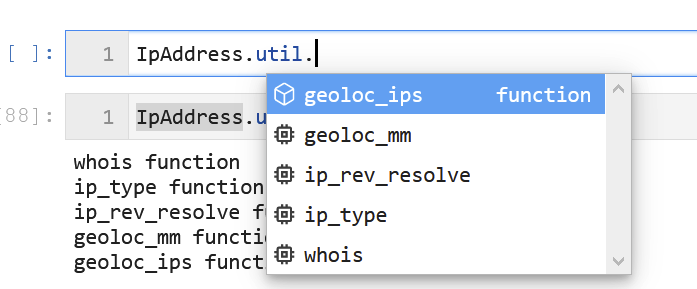

The containers ("util", etc.) are also callable
functions - they just return the list of functions they contain.

In [8]:
IpAddress.util()

geoloc (pivot function)
geoloc_ips (pivot function)
ip_rev_resolve (pivot function)
ip_type (pivot function)
whois (pivot function)


Now we're ready to run any of the functions for this entity

In [12]:
ip_addr = "20.72.193.242"
IpAddress.util.ip_type(ip_addr)

,ip,result,src_row_index
0,20.72.193.242,Public,0


In [13]:
IpAddress.util.whois(ip_addr)

,asn,asn_cidr,asn_country_code,asn_date,asn_description,asn_registry,nets,nir,query,raw,raw_referral,referral
0,8075,20.64.0.0/10,US,2017-10-18,"MICROSOFT-CORP-MSN-AS-BLOCK, US",arin,"[{'cidr': '20.40.0.0/13, 20.34.0.0/15, 20.48.0.0/12, 20.64.0.0/10, 20.33.0.0/16, 20.128.0.0/16, ...",None,20.72.193.242,None,None,None


In [14]:
IpAddress.util.ip_rev_resolve(ip_addr)

,qname,rdtype,response,ip_address,src_row_index
0,20.72.193.242,PTR,"None of DNS query names exist: 20.72.193.242., 20.72.193.242.corp.microsoft.com.",20.72.193.242,0


In [15]:
IpAddress.util.geoloc(ip_addr)

,CountryCode,CountryName,State,Longitude,Latitude,TimeGenerated,Type,IpAddress
0,US,United States,Washington,-122.3414,47.6034,2022-04-22 03:03:14.422813,geolocation,20.72.193.242


In [16]:
IpAddress.ti.lookup_ip(ip_addr)

,Ioc,IocType,SafeIoc,QuerySubtype,Provider,Result,Severity,Details,RawResult,Reference,Status
0,20.72.193.242,ipv4,20.72.193.242,None,RiskIQ,True,high,"{'summary': {'resolutions': 0, 'certificates': 0, 'malware_hashes': 0, 'projects': 0, 'articles'...","{'summary': {'resolutions': 0, 'certificates': 0, 'malware_hashes': 0, 'projects': 0, 'articles'...",https://community.riskiq.com,0
0,20.72.193.242,ipv4,20.72.193.242,None,Tor,True,information,Not found.,None,https://check.torproject.org/exit-addresses,0
0,20.72.193.242,ipv4,20.72.193.242,None,VirusTotal,True,information,"{'verbose_msg': 'IP address in dataset', 'response_code': 1, 'positives': 0, 'detected_urls': []}","{'detected_urls': [], 'asn': 8075, 'country': 'US', 'response_code': 1, 'as_owner': 'MICROSOFT-C...",https://www.virustotal.com/vtapi/v2/ip-address/report,0
0,20.72.193.242,ipv4,20.72.193.242,None,XForce,False,information,Authorization failed. Check account and key details.,<Response [401 Unauthorized]>,https://api.xforce.ibmcloud.com/ipr/20.72.193.242,401


Notice that we didn't need to worry about either the parameter
name or format (more on this in the next section). Also, 
whatever the function, the output is always returned
as a pandas DataFrame.

### For Data query functions you *do* need to worry about the parameter name
Data query functions are a little more complex than most other functions
and specifically often support many parameters. Rather than try
to guess which parameter you meant, we require you to be explicit.

To use a data query, we need to authenticate to the provider.

In [9]:
qry_prov.connect(workspace="CyberSecuritySoc")

Connecting... 

connected


We should now have many more data query pivots
attached to our entities

In [10]:
Host.pivots()

['MSSentinel_cybersecuritysoc.VMComputer_vmcomputer',
 'MSSentinel_cybersecuritysoc.auditd_auditd_all',
 'MSSentinel_cybersecuritysoc.az_nsg_interface',
 'MSSentinel_cybersecuritysoc.az_nsg_net_flows',
 'MSSentinel_cybersecuritysoc.az_nsg_net_flows_depr',
 'MSSentinel_cybersecuritysoc.heartbeat',
 'MSSentinel_cybersecuritysoc.heartbeat_for_host_depr',
 'MSSentinel_cybersecuritysoc.sec_alerts',
 'MSSentinel_cybersecuritysoc.sent_bookmarks',
 'MSSentinel_cybersecuritysoc.syslog_all_syslog',
 'MSSentinel_cybersecuritysoc.syslog_cron_activity',
 'MSSentinel_cybersecuritysoc.syslog_logon_failures',
 'MSSentinel_cybersecuritysoc.syslog_logons',
 'MSSentinel_cybersecuritysoc.syslog_squid_activity',
 'MSSentinel_cybersecuritysoc.syslog_sudo_activity',
 'MSSentinel_cybersecuritysoc.syslog_user_group_activity',
 'MSSentinel_cybersecuritysoc.syslog_user_logon',
 'MSSentinel_cybersecuritysoc.wevt_all_events',
 'MSSentinel_cybersecuritysoc.wevt_events_by_id',
 'MSSentinel_cybersecuritysoc.wevt_get_

If you are not sure of the parameters required by the query
you can use the built-in help

In [11]:
Host.MSSentinel_cybersecuritysoc.sec_alerts?

Signature: Host.MSSentinel_cybersecuritysoc.sec_alerts(*args, **kwargs) -> Union[pandas.core.frame.DataFrame, Any]
Docstring:
Retrieves list of alerts with a common host, account or process

Parameters
----------
account_name: str (optional)
    The account name to find
add_query_items: str (optional)
    Additional query clauses
end: datetime
    Query end time
host_name: str (optional)
    The hostname to find
path_separator: str (optional)
    Path separator
    (default value is: \\)
process_name: str (optional)
    The process name to find
query_project: str (optional)
    Column project statement
    (default value is:  | project-rename StartTimeUtc = StartTime, EndTim...)
start: datetime
    Query start time
table: str (optional)
    Table name
    (default value is: SecurityAlert)
File:      f:\anaconda\envs\msticpy\lib\functools.py
Type:      function


In [23]:
Host.MSSentinel_cybersecuritysoc.sec_alerts(host_name="victim00").head(5)

<IPython.core.display.Javascript object>

,TenantId,TimeGenerated,AlertDisplayName,AlertName,Severity,Description,ProviderName,VendorName,VendorOriginalId,SystemAlertId,ResourceId,SourceComputerId,AlertType,ConfidenceLevel,ConfidenceScore,IsIncident,StartTimeUtc,EndTimeUtc,ProcessingEndTime,RemediationSteps,ExtendedProperties,Entities,SourceSystem,WorkspaceSubscriptionId,WorkspaceResourceGroup,ExtendedLinks,ProductName,ProductComponentName,AlertLink,Status,CompromisedEntity,Tactics,Type,Computer,src_hostname,src_accountname,src_procname,host_match,acct_match,proc_match
0,8ecf8077-cf51-4820-aadd-14040956f35d,2021-03-11 12:05:14.355000+00:00,Suspected credential theft activity,Suspected credential theft activity,Medium,This program exhibits suspect characteristics potentially associated with credential theft. Onc...,MDATP,Microsoft,da637509097413415122_-841817867,bf226b1b-8bda-31f7-c848-1f8bbb5f5922,,,WindowsDefenderAtp,,NaN,False,2021-03-09 17:56:55.275000+00:00,2021-03-09 17:56:55.275000+00:00,2021-03-11 12:05:13.759000+00:00,"[\r\n ""1. Make sure the machine is completely updated and all your software has the latest patc...","{\r\n ""MicrosoftDefenderAtp.Category"": ""CredentialAccess"",\r\n ""MicrosoftDefenderAtp.Investiga...","[\r\n {\r\n ""$id"": ""4"",\r\n ""DnsDomain"": ""na.contosohotels.com"",\r\n ""HostName"": ""vict...",Detection,,,,Microsoft Defender Advanced Threat Protection,,https://securitycenter.microsoft.com/alert/da637509097413415122_-841817867?tid=4b2462a4-bbee-495...,New,victim00.na.contosohotels.com,CredentialAccess,SecurityAlert,victim00,victim00,,,True,False,False
1,8ecf8077-cf51-4820-aadd-14040956f35d,2021-03-11 13:24:53.495000+00:00,'Mimikatz' hacktool was detected,'Mimikatz' hacktool was detected,Low,"Readily available tools, such as hacking programs, can be used by unauthorized individuals to sp...",MDATP,Microsoft,da637510393722104539_-1180405651,ef04126b-2683-0a98-d01c-77ee6b1115ac,,,WindowsDefenderAv,,NaN,False,2021-03-11 06:00:14.083000+00:00,2021-03-11 06:00:14.083000+00:00,2021-03-11 13:24:53.379000+00:00,"[\r\n ""1. Make sure the machine is completely updated and all your software has the latest patc...","{\r\n ""MicrosoftDefenderAtp.Category"": ""Malware"",\r\n ""MicrosoftDefenderAtp.InvestigationId"": ...","[\r\n {\r\n ""$id"": ""4"",\r\n ""DnsDomain"": ""na.contosohotels.com"",\r\n ""HostName"": ""vict...",Detection,,,,Microsoft Defender Advanced Threat Protection,,https://securitycenter.microsoft.com/alert/da637510393722104539_-1180405651?tid=4b2462a4-bbee-49...,New,victim00.na.contosohotels.com,Unknown,SecurityAlert,victim00,victim00,,,True,False,False
2,8ecf8077-cf51-4820-aadd-14040956f35d,2021-03-11 13:24:53.490000+00:00,Suspected credential theft activity,Suspected credential theft activity,Medium,This program exhibits suspect characteristics potentially associated with credential theft. Onc...,MDATP,Microsoft,da637509097413415122_-841817867,bf226b1b-8bda-31f7-c848-1f8bbb5f5922,,,WindowsDefenderAtp,,NaN,False,2021-03-09 17:56:55.275000+00:00,2021-03-09 17:56:55.275000+00:00,2021-03-11 13:24:53.363000+00:00,"[\r\n ""1. Make sure the machine is completely updated and all your software has the latest patc...","{\r\n ""MicrosoftDefenderAtp.Category"": ""CredentialAccess"",\r\n ""MicrosoftDefenderAtp.Investiga...","[\r\n {\r\n ""$id"": ""4"",\r\n ""DnsDomain"": ""na.contosohotels.com"",\r\n ""HostName"": ""vict...",Detection,,,,Microsoft Defender Advanced Threat Protection,,https://securitycenter.microsoft.com/alert/da637509097413415122_-841817867?tid=4b2462a4-bbee-495...,New,victim00.na.contosohotels.com,CredentialAccess,SecurityAlert,victim00,victim00,,,True,False,False
3,8ecf8077-cf51-4820-aadd-14040956f35d,2021-03-11 13:19:42.521000+00:00,Malicious credential theft tool execution detected,Malicious credential theft tool execution detected,High,A known credential theft tool execution command line was detected.\nEither the process itself or...,MDATP,Microsoft,da637508847019595161_-562481393,753680a5-4d20-2726-61b4-9c36e620ea26,,,

## Browse and search for Pivot functions with the pivot browse

In [12]:
Pivot.browse()

## Standardized way of calling Pivot functions

Due to various factors (historical, underlying data,
developer laziness and forgetfullness, etc.) the functionality
in *MSTICPy* can be inconsistent in the way it uses input
parameters.

Also, many functions will only accept inputs as a single
value, or a list or a DataFrame or some unpredictable combination
of these.

Pivot functions allow you to largely forget about this - you
can use the same function whether you have:
- a single value
- a list (or any iterable) of values
- a DataFrame with the input value in one of the columns.

Let's take an example. 

Suppose we have a set of IP addresses pasted
from somewhere that we want to use as input.

We need to convert this into a Python data object of some sort.
To do this we can use another Pivot utility `%%txt2df`. This is a
Jupyter/IPython magic function so you can just paste you data in
a cell.
Use `%%txt2df --help` in an empty cell to see the full syntax.

The example below we specify a comma separator, that the
data has a headers row and to save the converted data as
a DataFrame named "ip_df".

> Warning this will overwrite any existing variable of this
name

In [13]:
%%txt2df --sep , --headers --name ip_df
idx, ip, type
0, 172.217.15.99, Public
1, 40.85.232.64, Public
2, 20.38.98.100, Public
3, 23.96.64.84, Public
4, 65.55.44.108, Public
5, 131.107.147.209, Public
6, 10.0.3.4, Private
7, 10.0.3.5, Private
8, 13.82.152.48, Public


,idx,ip,type
0,0,172.217.15.99,Public
1,1,40.85.232.64,Public
2,2,20.38.98.100,Public
3,3,23.96.64.84,Public
4,4,65.55.44.108,Public
5,5,131.107.147.209,Public
6,6,10.0.3.4,Private
7,7,10.0.3.5,Private
8,8,13.82.152.48,Public


For our example we'll also create a standard Python list
from the ip column.

In [14]:
ip_list = list(ip_df.ip)
print(ip_list)

['172.217.15.99', '40.85.232.64', '20.38.98.100', '23.96.64.84', '65.55.44.108', '131.107.147.209', '10.0.3.4', '10.0.3.5', '13.82.152.48']


### How did this work before?

If you recall the earlier example of `get_ip_type`, passing it
a list or DataFrame doesn't result in anything useful.

In [21]:
get_ip_type(ip_list)

['172.217.15.99', '40.85.232.64', '20.38.98.100', '23.96.64.84', '65.55.44.108', '131.107.147.209', '10.0.3.4', '10.0.3.5', '13.82.152.48'] does not appear to be an IPv4 or IPv6 address


'Unspecified'

### Pivot versions are much more forgiving

The pivotized version of get_ip_type can accept and correctly process
a list

In [22]:
IpAddress.util.ip_type(ip_list)

,ip,result,src_row_index
0,172.217.15.99,Public,0
1,40.85.232.64,Public,1
2,20.38.98.100,Public,2
3,23.96.64.84,Public,3
4,65.55.44.108,Public,4
5,131.107.147.209,Public,5
6,10.0.3.4,Private,6
7,10.0.3.5,Private,7
8,13.82.152.48,Public,8


When using a DataFrame as an input to pivot, things are a little more
complicated.
We have to pass the DataFrame to the function and also supply 
the name of the column thatcontains the input data.

In [30]:
IpAddress.util.whois(ip_df, column="ip")

,nir,asn_registry,asn,asn_cidr,asn_country_code,asn_date,asn_description,query,nets,raw,referral,raw_referral
0,NaN,arin,15169,172.217.15.0/24,US,2012-04-16,"GOOGLE, US",172.217.15.99,"[{'cidr': '172.217.0.0/16', 'name': 'GOOGLE', 'handle': 'NET-172-217-0-0-1', 'range': '172.217.0...",NaN,NaN,NaN
1,NaN,arin,8075,40.80.0.0/12,US,2015-02-23,"MICROSOFT-CORP-MSN-AS-BLOCK, US",40.85.232.64,"[{'cidr': '40.80.0.0/12, 40.124.0.0/16, 40.74.0.0/15, 40.76.0.0/14, 40.120.0.0/14, 40.125.0.0/17...",NaN,NaN,NaN
2,NaN,arin,8075,20.36.0.0/14,US,2017-10-18,"MICROSOFT-CORP-MSN-AS-BLOCK, US",20.38.98.100,"[{'cidr': '20.128.0.0/16, 20.33.0.0/16, 20.34.0.0/15, 20.36.0.0/14, 20.64.0.0/10, 20.40.0.0/13, ...",NaN,NaN,NaN
3,NaN,arin,8075,23.96.0.0/14,US,2013-06-18,"MICROSOFT-CORP-MSN-AS-BLOCK, US",23.96.64.84,"[{'cidr': '23.96.0.0/13', 'name': 'MSFT', 'handle': 'NET-23-96-0-0-1', 'range': '23.96.0.0 - 23....",NaN,NaN,NaN
4,NaN,arin,8075,65.52.0.0/14,US,2001-02-14,"MICROSOFT-CORP-MSN-AS-BLOCK, US",65.55.44.108,"[{'cidr': '65.52.0.0/14', 'name': 'MICROSOFT-1BLK', 'handle': 'NET-65-52-0-0-1', 'range': '65.52...",NaN,NaN,NaN
5,NaN,arin,3598,131.107.0.0/16,US,1988-11-11,"MICROSOFT-CORP-AS, US",131.107.147.209,"[{'cidr': '131.107.0.0/16', 'name': 'MICROSOFT', 'handle': 'NET-131-107-0-0-1', 'range': '131.10...",NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,arin,8075,13.64.0.0/11,US,2015-03-26,"MICROSOFT-CORP-MSN-AS-BLOCK, US",13.82.152.48,"[{'cidr': '13.64.0.0/11, 13.96.0.0/13, 13.104.0.0/14', 'name': 'MSFT', 'handle': 'NET-13-64-0-0-...",NaN,NaN,NaN


> Note: for most functions you can ignore the parameter
name and just specify it as a positional parameter.
You can also use the original parameter name of the underlying
function or the placeholder name "value".

The following are all equivalent:
```python
IpAddress.util.ip_type(ip_list)
IpAddress.util.ip_type(ip_str=ip_list)
IpAddress.util.ip_type(value=ip_list)
IpAddress.util.ip_type(data=ip_list)
```

When passing both a DataFrame and column name use:
```python
IpAddress.util.ip_type(data=ip_df, column="col_name")
```
You can also pass an entity instance of an entity
as a input parameter. The pivot code knows which attribute
or attributes of an entity will provider the input value.

In [31]:
ip_entity = IpAddress(Address="40.85.232.64")
IpAddress.util.ip_type(ip_entity)

,ip,result
0,40.85.232.64,Public


### Iterable/DataFrame inputs and single-value functions

Many of the underlying functions only accept single values
as inputs. Examples of these are the data query functions - typically
they expect a single host name, IP address, etc.

Pivot knows about the type of parameters that the function accepts.
It will adjust the input to match the expectations of the underlying
function. If a list or DataFrame is passed as input to a single-value
function Pivot will split the input and call the function once for
each value. It then combines the output into a single DataFrame
before returning the results. 

You can read a bit more about how this is done in the Appendix TODO

### Data queries - where does the time range come from?

The Pivot class has a buit-in time range. This is used by
default for all queries. Don't worry - you can change it easily

In [23]:
mp.pivot.timespan

TimeSpan(start=2022-06-08 22:10:15.959575+00:00, end=2022-06-09 22:10:15.959575+00:00, period=1 day, 0:00:00)

You can edit the time range interactively

In [24]:
mp.pivot.edit_query_time()

Or by setting the timespan property directly

In [34]:
from msticpy.common.timespan import TimeSpan
# TimeSpan accepts datetimes or datestrings
timespan = TimeSpan(start="02/01/2021", end="02/15/2021")
mp.pivot.timespan = timespan

There is also a convenience function
for setting the time directly with Python datetimes or date strings

In [17]:
mp.pivot.current.set_timespan(start="2020-02-06 03:00:00", end="2021-02-15 01:42:42")

You can also override the built-in time settings by specifying
`start` and `end` as parameters.

In [25]:
dt1 = mp.pivot.timespan.start
dt2 = mp.pivot.timespan.end
Host.MSSentinel_cybersecuritysoc.sec_alerts(host_name="victim00", start=dt1, end=dt2)

,TenantId,TimeGenerated,AlertDisplayName,AlertName,Severity,Description,ProviderName,VendorName,VendorOriginalId,SystemAlertId,ResourceId,SourceComputerId,AlertType,ConfidenceLevel,ConfidenceScore,IsIncident,StartTimeUtc,EndTimeUtc,ProcessingEndTime,RemediationSteps,ExtendedProperties,Entities,SourceSystem,WorkspaceSubscriptionId,WorkspaceResourceGroup,ExtendedLinks,ProductName,ProductComponentName,AlertLink,Status,CompromisedEntity,Tactics,Techniques,Type,Computer,src_hostname,src_accountname,src_procname,host_match,acct_match,proc_match


### Supplying extra parameters

The Pivot layer will pass any unused keyword parameters to the
underlying function. This *does not* usually apply to positional parameters -
if you want parameters to get to the function, you have to name them
explicitly.
In this example the `add_query_items` parameter is passed to the underlying
query function

In [37]:
Host.MSSentinel_cybersecuritysoc.wevt_logons(
    host_name="victimPc",
    add_query_items="| summarize count() by LogonType"
)

<IPython.core.display.Javascript object>

,LogonType,count_
0,5,21650
1,3,6808
2,4,9426
3,2,109
4,10,44
5,0,7
6,9,8


## Pivot Pipelines

Because all pivot functions accept DataFrames as input
and produce DataFrames as output, it means that it is possible
to chain pivot functions into a pipeline.

### Joining input to output
You can join the input to the output. This usually only makes sense
when the input is a DataFrame. It
lets you keep the previously accumumated results and tag on the
additional columns produced by the pivot function you are calling.

The `join` parameter supports "inner", "left", "right" and "outer"
joins (be careful with the latter though!)
See [pivot joins documentation](https://msticpy.readthedocs.io/en/latest/data_analysis/PivotFunctions.html#joining-input-to-output-data)

Although joining is useful in pipelines you can use it on
any function whether in a pipeline or not.

In [38]:
IpAddress.util.whois(ip_df, column="ip", join="inner")

,idx,ip,type,nir,asn_registry,asn,asn_cidr,asn_country_code,asn_date,asn_description,query,nets,raw,referral,raw_referral
0,0,172.217.15.99,Public,NaN,arin,15169,172.217.15.0/24,US,2012-04-16,"GOOGLE, US",172.217.15.99,"[{'cidr': '172.217.0.0/16', 'name': 'GOOGLE', 'handle': 'NET-172-217-0-0-1', 'range': '172.217.0...",NaN,NaN,NaN
1,1,40.85.232.64,Public,NaN,arin,8075,40.80.0.0/12,US,2015-02-23,"MICROSOFT-CORP-MSN-AS-BLOCK, US",40.85.232.64,"[{'cidr': '40.80.0.0/12, 40.124.0.0/16, 40.74.0.0/15, 40.76.0.0/14, 40.120.0.0/14, 40.125.0.0/17...",NaN,NaN,NaN
2,2,20.38.98.100,Public,NaN,arin,8075,20.36.0.0/14,US,2017-10-18,"MICROSOFT-CORP-MSN-AS-BLOCK, US",20.38.98.100,"[{'cidr': '20.128.0.0/16, 20.33.0.0/16, 20.34.0.0/15, 20.36.0.0/14, 20.64.0.0/10, 20.40.0.0/13, ...",NaN,NaN,NaN
3,3,23.96.64.84,Public,NaN,arin,8075,23.96.0.0/14,US,2013-06-18,"MICROSOFT-CORP-MSN-AS-BLOCK, US",23.96.64.84,"[{'cidr': '23.96.0.0/13', 'name': 'MSFT', 'handle': 'NET-23-96-0-0-1', 'range': '23.96.0.0 - 23....",NaN,NaN,NaN
4,4,65.55.44.108,Public,NaN,arin,8075,65.52.0.0/14,US,2001-02-14,"MICROSOFT-CORP-MSN-AS-BLOCK, US",65.55.44.108,"[{'cidr': '65.52.0.0/14', 'name': 'MICROSOFT-1BLK', 'handle': 'NET-65-52-0-0-1', 'range': '65.52...",NaN,NaN,NaN
5,5,131.107.147.209,Public,NaN,arin,3598,131.107.0.0/16,US,1988-11-11,"MICROSOFT-CORP-AS, US",131.107.147.209,"[{'cidr': '131.107.0.0/16', 'name': 'MICROSOFT', 'handle': 'NET-131-107-0-0-1', 'range': '131.10...",NaN,NaN,NaN
6,8,13.82.152.48,Public,NaN,arin,8075,13.64.0.0/11,US,2015-03-26,"MICROSOFT-CORP-MSN-AS-BLOCK, US",13.82.152.48,"[{'cidr': '13.64.0.0/11, 13.96.0.0/13, 13.104.0.0/14', 'name': 'MSFT', 'handle': 'NET-13-64-0-0-...",NaN,NaN,NaN


<hr>

### Pipelines 

Pivot pipelines are implemented pandas customr accessors.
Read more about [Extending pandas here](https://pandas.pydata.org/pandas-docs/stable/development/extending.html)

When you load Pivot it adds the `mp_pivot` accessor to the pandas
`DataFrame` class. This
appears as an attribute to DataFrames.

```python
>>> ips_df.mp_pivot
<msticpy.datamodel.pivot_pd_accessor.PivotAccessor at 0x275754e2208>
```

The main pipelining function `run` is a method of `mp_pivot`.
`run` requires two parameters - the pivot function to run and
the column to use as input. See [mp_pivot.run documentation](https://msticpy.readthedocs.io/en/latest/data_analysis/PivotFunctions.html#mp-pivot-run)


In [43]:
# Create a dataframe for input
ip_list = [
    "192.168.40.32",
    "192.168.1.216",
    "192.168.153.17",
    "3.88.48.125",
    "10.200.104.20",
    "192.168.90.101",
    "192.168.150.50",
    "172.16.100.31",
    "192.168.30.189",
    "10.100.199.10",
]
ips_df = pd.DataFrame(ip_list, columns=["IP"])

### Pipeline example

Here is an example of using `mp_pivot` to call 4 pivot functions, each
using the output of the previous function as input and using
the `join` parameter to accumulate the results from each
stage.

Let's step through it line by line.
1. The whole thing is surrounded by a pair of parentheses - this is just
   to let us split the whole expression over multiple lines without
   Python complaining.
2. Next we have `ips_df` - this is just the starting DataFrame, our input data.
3. Next we call the `mp_pivot.run()` accessor method on this dataframe.
   We pass it the pivot function that we want to run and the input column name.
   This column name is the column in ips_df where our input IP addresses are.
   We've also specified an `join` type of inner. In this case the join type doesn't
   really matter since we know we get exactly one output row for every input row.
4. We're using the pandas `query` function to filter out unwanted entries
   from the previous stage. In this case we only want Public IP addresses. 
   This illustrates that you can intersperse standard pandas functions
   in the same pipeline. We could have also added a column selector expression
   ([["col1", "col2"...]]) if we wanted to filter the columns passed to the 
   next stage
5. We are calling a further pivot function - `whois`. Remember the "column" parameter
   always refers to the input column, i.e. the column from previous stage
   that we want to use in this stage.
6. We are calling `geoloc` to get geo location details joining with a left
   join - this preserves the input data rows and adds null columns in any cases
   where the pivot function returned no result.
7. Is the same as 6 except is a data query to see if we have any alerts
   that contain these IP addresses. Remember, in the case of data queries
   we have to name the specific query parameter that we want the input to 
   go to. In this case, each row value in the "ip" column from the previous
   stage will be sent to the query.
8. Finally we close the parentheses to form a valid Python expression.
   The whole expression returns a DataFrame so we can add further pandas
   operations here (like `.head(5)` shown here).

In [44]:
(
    ips_df
    .mp_pivot.run(IpAddress.util.ip_type, column="IP", join="inner")
    .query("result == 'Public'").head(10)
    .mp_pivot.run(IpAddress.util.whois, column="ip", join="left")
    .mp_pivot.run(IpAddress.util.geoloc, column="ip", join="left")
    .mp_pivot.run(IpAddress.MSSentinel_cybersecuritysoc.sec_list_alerts_for_ip, source_ip_list="ip", join="left")
).head(5)

<IPython.core.display.Javascript object>

,IP,ip,result,asn,asn_cidr,asn_country_code,asn_date,asn_description,asn_registry,nets,nir,query,raw,raw_referral,referral,CountryCode,CountryName,State,City,Longitude,Latitude,Asn,edges,Type_x,AdditionalData,...,AlertType,ConfidenceLevel,ConfidenceScore,IsIncident,StartTimeUtc,EndTimeUtc,ProcessingEndTime,RemediationSteps,ExtendedProperties,Entities,SourceSystem,WorkspaceSubscriptionId,WorkspaceResourceGroup,ExtendedLinks,ProductName,ProductComponentName,AlertLink,Status,CompromisedEntity,Tactics,Type_y,SystemAlertId1,ExtendedProperties1,Entities1,MatchingIps
0,3.88.48.125,3.88.48.125,Public,14618,3.80.0.0/12,US,2017-12-20,"AMAZON-AES, US",arin,"[{'cidr': '3.0.0.0/9', 'name': 'AT-88-Z', 'handle': 'NET-3-0-0-0-1', 'range': '3.0.0.0 - 3.127.2...",None,3.88.48.125,None,None,None,US,United States,Virginia,Ashburn,-77.4728,39.0481,None,{},geolocation,{},...,8ecf8077-cf51-4820-aadd-14040956f35d_8a369bd2-97b6-4fe2-922a-cd170faf25bc,,NaN,False,2020-12-19 13:04:59+00:00,2020-12-19 19:04:59+00:00,2020-12-19 19:10:17+00:00,,"{\r\n ""Query"": ""// The query_now parameter (in UTC format) was prepended to the query to reflec...","[\r\n {\r\n ""$id"": ""3"",\r\n ""Address"": ""3.88.48.125"",\r\n ""Type"": ""ip""\r\n }\r\n]",Detection,d1d8779d-38d7-4f06-91db-9cbc8de0176f,soc,,Azure Sentinel,Scheduled Alerts,,New,,CommandAndControl,SecurityAlert,fdc54c12-efba-38b0-8379-f06d7fbfd34a,"{\r\n ""Query"": ""// The query_now parameter (in UTC format) was prepended to the query to reflec...","[\r\n {\r\n ""$id"": ""3"",\r\n ""Address"": ""3.88.48.125"",\r\n ""Type"": ""ip""\r\n }\r\n]",[3.88.48.125]
1,3.88.48.125,3.88.48.125,Public,14618,3.80.0.0/12,US,2017-12-20,"AMAZON-AES, US",arin,"[{'cidr': '3.0.0.0/9', 'name': 'AT-88-Z', 'handle': 'NET-3-0-0-0-1', 'range': '3.0.0.0 - 3.127.2...",None,3.88.48.125,None,None,None,US,United States,Virginia,Ashburn,-77.4728,39.0481,None,{},geolocation,{},...,ThreatIntelligence,83,NaN,False,2020-12-23 13:48:23+00:00,2020-12-23 13:48:23+00:00,2020-12-23 14:08:15+00:00,,"{\r\n ""Query"": ""CommonSecurityLog| where RequestURL hasprefix(\""www.arboretum.hu\"") | where Tim...","[\r\n {\r\n ""$id"": ""3"",\r\n ""DnsDomain"": ""www.arboretum.hu"",\r\n ""HostName"": ""www.arbo...",Detection,d1d8779d-38d7-4f06-91db-9cbc8de0176f,soc,,Azure Sentinel,Microsoft Threat Intelligence Analytics,,New,3.88.48.125,Unknown,SecurityAlert,625ff9af-dddc-0cf8-9d4b-e79067fa2e71,"{\r\n ""Query"": ""CommonSecurityLog| where RequestURL hasprefix(\""www.arboretum.hu\"") | where Tim...","[\r\n {\r\n ""$id"": ""3"",\r\n ""DnsDomain"": ""www.arboretum.hu"",\r\n ""HostName"": ""www.arbo...",[3.88.48.125]
2,3.88.48.125,3.88.48.125,Public,14618,3.80.0.0/12,US,2017-12-20,"AMAZON-AES, US",arin,"[{'cidr': '3.0.0.0/9', 'name': 'AT-88-Z', 'handle': 'NET-3-0-0-0-1', 'range': '3.0.0.0 - 3.127.2...",None,3.88.48.125,None,None,None,US,United States,Virginia,Ashburn,-77.4728,39.0481,None,{},geolocation,{},...,ThreatIntelligence,83,NaN,False,2020-12-23 13:48:23+00:00,2020-12-23 13:48:23+00:00,2020-12-23 14:08:15+00:00,,"{\r\n ""Query"": ""CommonSecurityLog| where RequestURL hasprefix(\""www.arboretum.hu\"") | where Tim...","[\r\n {\r\n ""$id"": ""3"",\r\n ""DnsDomain"": ""www.arboretum.hu"",\r\n ""HostName"": ""www.arbo...",Detection,d1d8779d-38d7-4f06-91db-9cbc8de0176f,soc,,Azure Sentinel,Microsoft Threat Intelligence Analytics,,New,3.88.48.125,Unknown,SecurityAlert,c977f904-ab30-d57e-986f-9d6ebf72771b,"{\r\n ""Query"": ""CommonSecurityLog| where RequestURL hasprefix(\""www.arboretum.hu\"") | where Tim...","[\r\n {\r\n ""$id"": ""3"",\r\n ""DnsDomain"": ""www.arboretum.hu"",\r\n ""HostName"": ""www.arbo...",[3.88.48.125]
3,3.88.48.125,3.88.48.125,Public,14618,3.80.0.0/12,US,2017-12-20,"AMAZON-AES, US",arin,"[{'cidr': '3.0.0.0/9', 'name': 'AT-88-Z', 'handle': 'NET-3-0-0-0-1', 'range': '3.0.0.0 - 3.127.2...",None,3.88.48.125,None,None,None,US,United States,Virginia,Ashburn,-77.4728,39.0481,None,{},geolocation,{},...,ThreatIntelligence,83,NaN,False,2020-12-23 13:48

### Other pipeline functions

In addition to `run`, the `mp_pivot` accessor also 
has the following functions:
- `display` - this simply displays the data at the point called in
  the pipeline. You can add an optional title, filtering and the number
  or rows to display
- `tee` - this forks a copy of the dataframe at the point it is
  called in the pipeline. It will assign the forked copy to the name
  given in the `var_name` parameter. If there is an existing variable of
  the same name it will not overwrite it unless you add the `clobber=True`
  parameter.
  
In both cases the pipelined data is passed through unchanged.
See [Pivot functions help](https://msticpy.readthedocs.io/en/latest/data_analysis/PivotFunctions.html#mp-pivot-display)
for more details.

Use of these is shown below

```
    ...
    .mp_pivot.run(entities.IpAddress.util.geoloc, column="ip", join="left")
    .mp_pivot.display(title="Geo Lookup", cols=["IP", "City"])  # << display an intermediate result
    .mp_pivot.tee(var_name="geoip_df", clobber=True)  # << save a copy called 'geoip_df'
    .mp_pivot.run(entities.IpAddress.AzureSentinel.SecurityAlert_list_alerts_for_ip, source_ip_list="ip", join="left")
```

In the next release we've also implemented:
- `tee_exec` - this executes a function on a forked copy of the DataFrame
  The function must be a pandas function or custom accessor. A
  good example of the use of this might be creating a plot or summary
  table to display partway through the pipeline.

## Extending Pivot - adding your own (or someone else's) functions

You can add pivot functions of your own. You need to supply:
- the function
- some metadata that describes where the function can be found
  and how the function works


Full details of this are [described here](https://msticpy.readthedocs.io/en/latest/data_analysis/PivotFunctions.html#adding-custom-functions-to-the-pivot-interface).

In [27]:
from hashlib import md5

def my_func2(input: str):
    md5_hash = "-".join(hex(b)[2:] for b in md5("hello".encode("utf-8")).digest())
    return {
        "Title": input.upper(),
        "Hash": md5_hash
    }


mp.Pivot.add_pivot_function(
    func=my_func2,
    container="cyber",  # which container it will appear in on the entity
    input_type="value",
    entity_map={"Host": "HostName"},
    func_input_value_arg="input",
    func_new_name="il_upper_hash_name",
)


### Now run the function

In [ ]:

Host.cyber.il_upper_hash_name("host_name")

## Conclusion

We've taken a short tour through the *MSTICPy* looking at how
they make the functionality in the package easier to discover
and use.
I'm particularly excited about the pipeline functionality.
In the next release we're going to make it possible to define
reusable pipelines in configuration files and execute them
with a single function call. This should help streamline
some common patterns in notebooks for Cyber hunting and investigation.

Please send any feedback or suggestions for improvements
to msticpy@microsoft.com or create an issue on https://github.com/microsoft/msticpy.

Happy hunting!

# Appendix - how do pivot wrappers work?

In Python you can create functions that return other functions.
On the way they can change how the arguments and output are
processed.

Take this simple function that just applies proper capitalization
to an input string.

In [35]:
def print_me(arg):
    print(arg.capitalize())
    
print_me("hello")

Hello


If we try to pass a list to this function we get an 
expected exception about lists not supporting `capitalize`

In [66]:
print_me(["hello", "world"])

NameError: name 'print_me' is not defined

We could create a wrapper function that checked the
input and iterated over the individual items if arg is a list.
The works but we don't want to have to do this for every 
function that we want to have flexible input!

In [37]:
def print_me_list(arg):
    if isinstance(arg, list):
        for item in arg:
            print_me(item)
    else:
        print_me(arg)
        
print_me_list("hello")
print_me_list(["how", "are", "you", "?"])

Hello
How
Are
You
?


Instead we can create a function wrapper. The outer function
`dont_care_func` defines an inner function, `list_or_str` and then
returns this function. The inner function `list_or_str` is what
implements the same "is-this-a-string-or-list" logic that we 
saw in the previous example. 
Crucially though, it isn't hard-coded to call `print_me` but
calls whatever function passed to it from the outer function
`dont_care_func`.

In [38]:
# Our magic wrapper

def dont_care_func(func):
    
    def list_or_str(arg):
        if isinstance(arg, list):
            for item in arg:
                func(item)
        else:
            func(arg)
    return list_or_str

How do we use this?

We simply pass the function that we want to wrap to
`dont_care_func`. Recall, that this function just returns
an instance of the inner function. In this particular instance
the value `func` will have been replaced by the actual function
`print_me`.

In [38]:
print_stuff = dont_care_func(print_me)

Now we have a wrapped version of `print_me` that can
handle different types of input. Magic!

In [39]:
print_stuff("hello")
print_stuff(["how", "are", "you", "?"])

Hello
How
Are
You
?


We can also define further functions and create wrapped
versions of those by passing them to `dont_care_func`.

In [118]:
def shout_me(arg):
    print(arg.upper(), "\U0001F92C!", end=" ")
    
shout_stuff = dont_care_func(shout_me)

In [119]:
shout_stuff("hello")
shout_stuff(["how", "are", "you", "?"])

HELLO 🤬! HOW 🤬! ARE 🤬! YOU 🤬! ? 🤬! 

The wrapper functionality in Pivot is a bit more complex than
this but essentially operates this way.